In [ ]:
import pandas as pd

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/True.csv")

In [ ]:
fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",fake


In [ ]:
true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",true
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",true
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",true
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",true
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",true


In [ ]:
true['label'] = 1
fake['label'] = 0
data = pd.concat([true, fake])  ## creating a target column named ‘label’ in both real and fake news data and concatenating them

In [ ]:
## now real news has the value of label as 1 and fake news have the value of label as 0.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


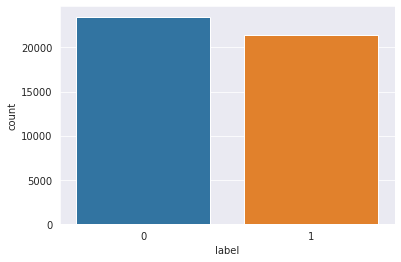

In [ ]:
## using  use seaborn library to plot the counts of real and fake news.
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(data['label']);

## from the plot we can see that our data is balanced

In [ ]:

data.isnull().sum()  ## checking for null values
## there are 5 columns in the data

title      0
text       0
subject    0
date       0
target     0
label      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


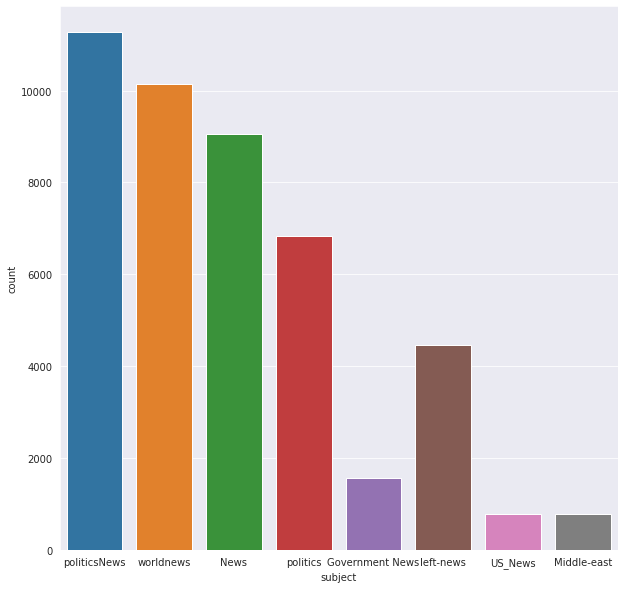

In [ ]:
import matplotlib.pyplot as plt
data['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(data['subject']);

## there are news on 8 subjects.Highest for politics

[Text(0, 0, '0'), Text(0, 0, '1')]

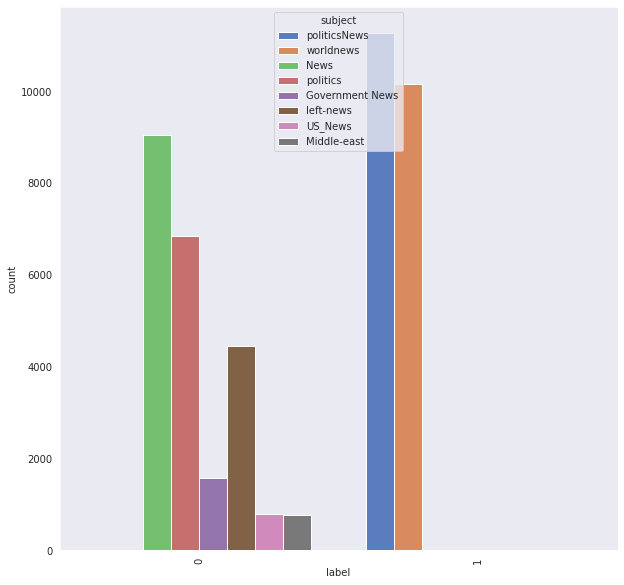

In [ ]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)  
## from plot we can see that real news belongs to subject

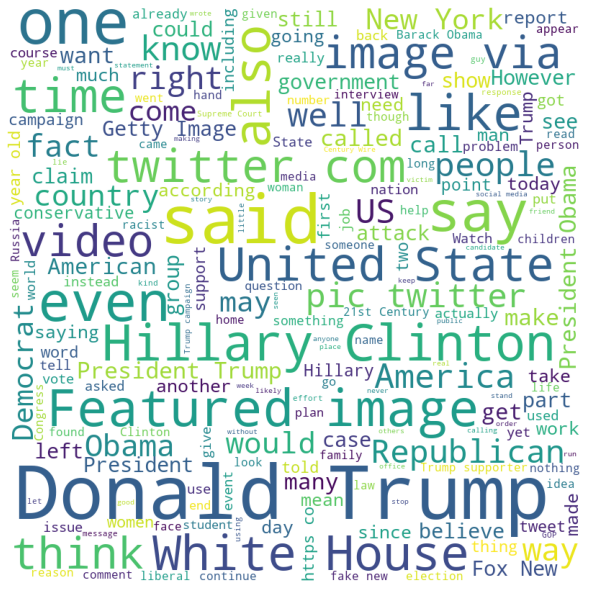

In [ ]:
## wordcloud annalyze the most frequent word in our data
## stop word are removed .These are the most commonly used words in our data
from nltk.corpus import stopwords
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text))   ## for fakes news
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

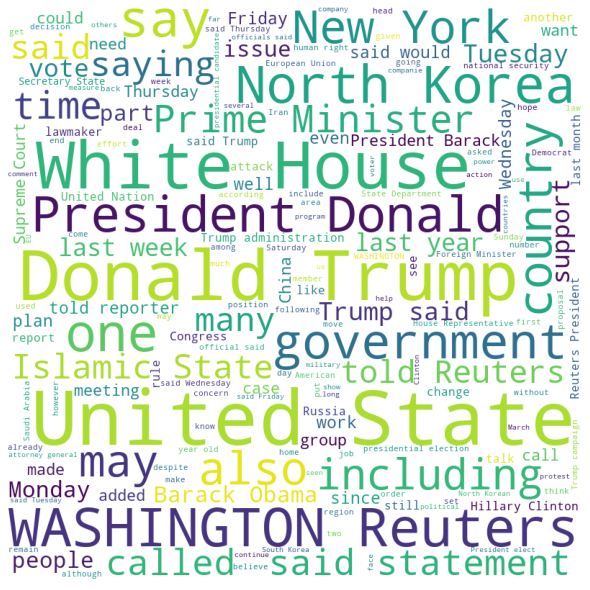

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text))   ## for true news
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
#splitting data for training and testing
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['label'],test_size=0.2, random_state = 1)


accuracy:   93.909


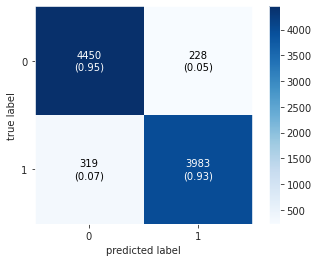

In [ ]:
#Multinomial NB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics                                                 
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.677


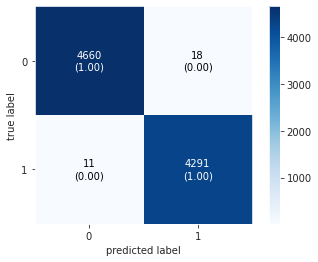

In [ ]:
#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

accuracy:   99.655


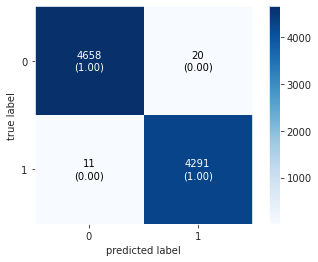

In [ ]:
#Passive Aggressive Classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf',  PassiveAggressiveClassifier())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()